### **方框滤波**

方框滤波是均值滤波的一般形式，会将所有像素值求和但不会进行归一化（求平均）

但正常图像处理都要进行归一化，因此不考虑数据类型的情况下方框滤波和均值滤波的效果相同

cv.sqrBoxFilter()函数是对滤波器内每个像素的平方求和，因此是扩展版本，主要针对类型为float32的图像，归一化后的图像变模糊也会变暗

In [21]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [22]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png')
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [23]:
# 验证方波滤波算法的矩阵
points = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25]], dtype='float32')
# 将图像转换为float32类型的数据
img_32 = img.astype('float32')
img_32 /= 255.0 # 将图像映射到0 ~ 1

In [24]:
# 方框滤波
# 对图像进行操作
# 进行归一化
img_box_norm = cv.boxFilter(img, -1, (3, 3), anchor=(-1, -1), normalize=True)
# 不进行归一化
img_box = cv.boxFilter(img, -1, (3, 3), anchor=(-1, -1), normalize=False)

In [25]:
# 对矩阵进行操作
# 进行归一化
points_sqr_norm = cv.sqrBoxFilter(points, -1, (3, 3), anchor=(-1, -1), normalize=True, borderType=cv.BORDER_CONSTANT)
img_sqr_norm = cv.sqrBoxFilter(img, -1, (3, 3), anchor=(-1, -1), normalize=True, borderType=cv.BORDER_CONSTANT)
# 不进行归一化
points_sqr = cv.sqrBoxFilter(points, -1, (3, 3), anchor=(-1, -1), normalize=False, borderType=cv.BORDER_CONSTANT)
img_sqr = cv.sqrBoxFilter(img, -1, (3, 3), anchor=(-1, -1), normalize=False, borderType=cv.BORDER_CONSTANT)
print('进行归一化后的矩阵为：\n{}'.format(points_sqr_norm))
print('不进行归一化后的矩阵为：\n{}'.format(points_sqr))

进行归一化后的矩阵为：
[[ 10.          18.11111111  24.77777778  32.77777778  24.66666667]
 [ 39.44444444  66.33333333  81.33333333  98.33333333  71.44444444]
 [ 99.44444444 161.33333333 186.33333333 213.33333333 151.44444444]
 [192.77777778 306.33333333 341.33333333 378.33333333 264.77777778]
 [163.33333333 258.11111111 284.77777778 312.77777778 218.        ]]
不进行归一化后的矩阵为：
[[  90.  163.  223.  295.  222.]
 [ 355.  597.  732.  885.  643.]
 [ 895. 1452. 1677. 1920. 1363.]
 [1735. 2757. 3072. 3405. 2383.]
 [1470. 2323. 2563. 2815. 1962.]]


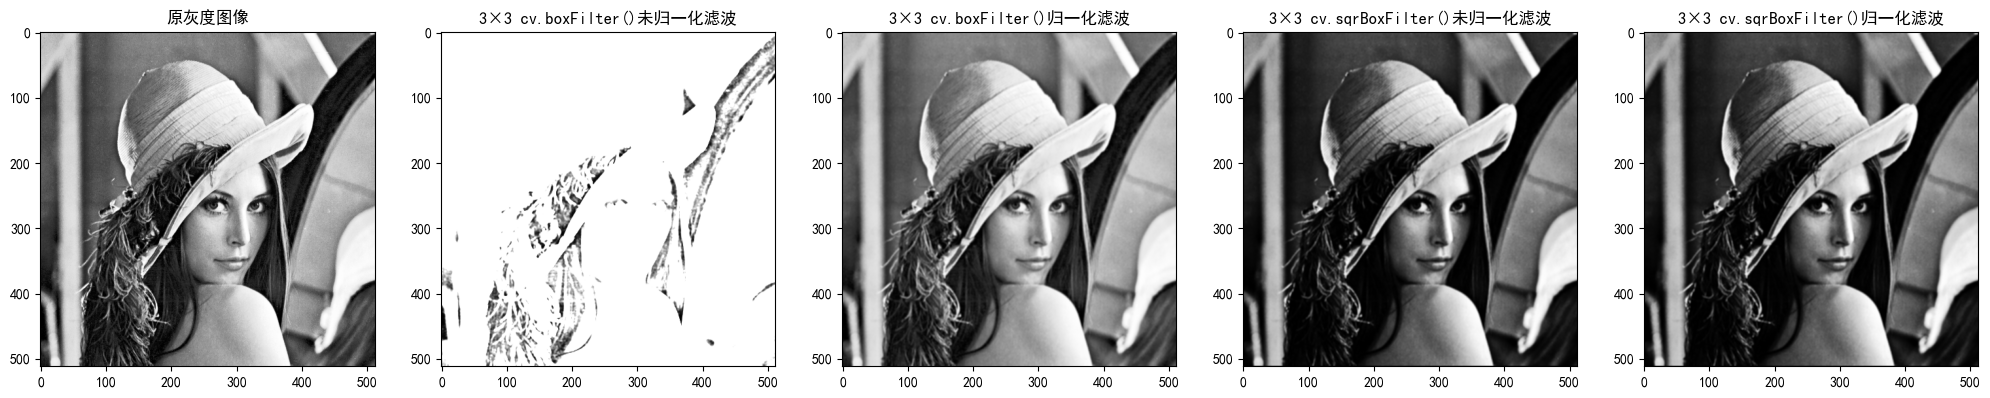

In [ ]:
# 展示图像滤波结果
plt.figure(figsize=(25, 5))
plt.subplot(1, 5, 1)
plt.title('原灰度图像')
plt.imshow(img, cmap='gray')
plt.subplot(1, 5, 2)
plt.title('3×3 cv.boxFilter()未归一化滤波')
plt.imshow(img_box, cmap='gray')
plt.subplot(1, 5, 3)
plt.title('3×3 cv.boxFilter()归一化滤波')
plt.imshow(img_box_norm, cmap='gray')
plt.subplot(1, 5, 4)
plt.title('3×3 cv.sqrBoxFilter()未归一化滤波')
plt.imshow(img_sqr / np.max(img_sqr), cmap='gray') # 除以最大值映射到0~1
plt.subplot(1, 5, 5)
plt.title('3×3 cv.sqrBoxFilter()归一化滤波')
plt.imshow(img_sqr_norm / np.max(img_sqr_norm), cmap='gray')